In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop("Id", axis=1)

In [5]:
X = df.drop("Species", axis=1)
y = df["Species"] 
le = LabelEncoder()
y = le.fit_transform(y)

print("Encoded Classes:", le.classes_)

Encoded Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 105
Testing samples: 45


In [7]:
 model = GaussianNB() 
model.fit(X_train, y_train)

print("Model Trained Successfully")

Model Trained Successfully


In [8]:
y_pred = model.predict(X_test)
print("Predictions:\n", y_pred)

Predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

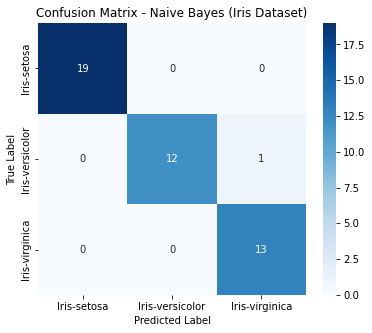

In [10]:
cm = confusion_matrix(y_test, y_pred)
 
plt.figure(figsize=(6,5))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes (Iris Dataset)")
plt.show()

In [12]:
accuracy = np.trace(cm) / np.sum(cm)
error_rate = 1 - accuracy

print("\nOverall Accuracy:", accuracy)
print("Error Rate:", error_rate )
for i in range(len(le.classes_)):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    print(f"\nClass: {le.classes_[i]}")
    print("Precision:", precision)
    print("Recall:", recall)


Overall Accuracy: 0.9777777777777777
Error Rate: 0.022222222222222254

Class: Iris-setosa
Precision: 1.0
Recall: 1.0

Class: Iris-versicolor
Precision: 1.0
Recall: 0.9230769230769231

Class: Iris-virginica
Precision: 0.9285714285714286
Recall: 1.0


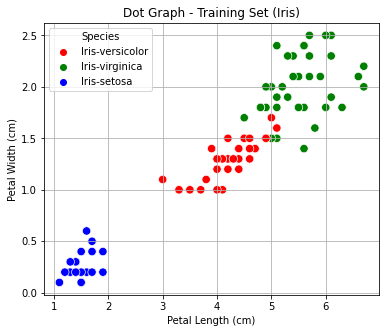

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

sns.scatterplot(
    x=X_train["PetalLengthCm"],
    y=X_train["PetalWidthCm"],
    hue=le.inverse_transform(y_train),
    palette=["red", "green", "blue"],
    s=70
)

plt.title("Dot Graph - Training Set (Iris)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.grid(True)
plt.show()

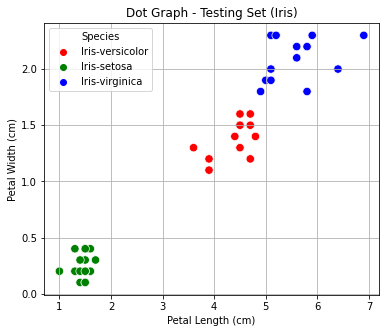

In [19]:
plt.figure(figsize=(6,5))

sns.scatterplot(
    x=X_test["PetalLengthCm"],
    y=X_test["PetalWidthCm"],
    hue=le.inverse_transform(y_test),
    palette=["red", "green", "blue"],
    s=70
)

plt.title("Dot Graph - Testing Set (Iris)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.grid(True)
plt.show()